<a href="https://colab.research.google.com/github/suki-chung/suki-chung/blob/main/Python_Final_Project_SUK_YI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Python: Colab Notebooks/2425MBD41_Project_Dataset.xlsx',sheet_name='COMPANY')
df2 = pd.read_excel('/content/drive/MyDrive/Python: Colab Notebooks/2425MBD41_Project_Dataset.xlsx',sheet_name='INVESTMENT')
df3 = pd.read_excel('/content/drive/MyDrive/Python: Colab Notebooks/2425MBD41_Project_Dataset.xlsx',sheet_name='ACQUISITION')
df4 = pd.read_excel('/content/drive/MyDrive/Python: Colab Notebooks/2425MBD41_Project_Dataset.xlsx',sheet_name='EMPLOYEE')

In [ ]:
# Check df1 shape
df1.shape

(1000, 8)

In [ ]:
# Drop duplicated entries in 'COMPANY_NAME', if any
df1.drop_duplicates('COMPANY_NAME').shape

(1000, 8)

## **1. What are the distributions of the current status of the companies?**

In [ ]:
# Find counts for each company status
closed = df1['CLOSED_ON'] != '—'
closed_counts = df1[closed].value_counts().sum()

exited = df1['EXITED_ON'] != '—'
exited_counts = df1[exited].value_counts().sum()

active = ~closed & ~exited
active_counts = df1[active].value_counts().sum()

# Creating a new df
data = {
    'Company_Status': ['Closed', 'Exited', 'Active'],
    'Counts': [closed_counts, exited_counts, active_counts]
}

comp_status_df = pd.DataFrame(data, columns=['Company_Status','Counts'])

print(comp_status_df)

#Visually illustrating the data
import plotly.express as px

fig = px.pie(comp_status_df,
             values='Counts',
             names='Company_Status',
             title='Current Status of the Companies',
             color='Company_Status',
             color_discrete_sequence = ['red', 'orange', 'green'])

fig.show()

  Company_Status  Counts
0         Closed       5
1         Exited     322
2         Active     674


  *There are 1000 firms in the dataset. As depicted in the pie chart above, 67% of them remain active, while 32% have exited and only 0.5% are closed down.*


---




## **2. Where are the active companies located?**

In [ ]:
# Extracting only the Country in the 'LOCATION' column
df1.loc[:,'LOCATION'] = df1['LOCATION'].str.split(', ').str[-1].str.strip()

# Counts of the Active Companies' Location
location_counts = df1[active].value_counts('LOCATION').reset_index()
location_counts.columns = ['Country', 'Count']

print('Snippets of Location Counts:\n\n',
      location_counts.head(10))

#Visually illustrating the data
fig = px.choropleth(location_counts,
                    locations='Country',
                    locationmode='country names',
                    color=np.log(location_counts['Count']),
                    color_continuous_scale='Greens',
                    hover_data={'Count': True},
                    title='Distribution of Active Companies Worldwide')

fig.show()

Snippets of Location Counts:

           Country  Count
0   United States    439
1  United Kingdom     54
2           India     50
3         Germany     24
4          Canada     13
5          Israel     13
6           China     12
7          France      7
8          Brazil      5
9       Singapore      5


*Zooming into the 647 active companies, the United States dominates the landscape with 439 companies, accounting for approximately 68% of the total. The UK follows with a significant presence of 54 companies, while India contributes 50.*

*This distribution highlights the United States as a central hub for business activity among these active companies.*


---




# **3. What are the characteristics of firms with more than $1bn revenue?**


In [ ]:
# Filtering companies with more than $1B revenue
above_1bn = (df1['REVENU_RANGE'] == '$1B to $10B') | (df1['REVENU_RANGE'] == '$10B+')
df1_1bn = df1[above_1bn]

print('Total number of firms with more than $1bn revenue:', df1_1bn.shape[0])

# Characteristics 1: Company size/ employee numbers
employee_counts = df1_1bn.groupby('EMPLOYEE_NUMBER')['REVENU_RANGE'].count().reset_index().sort_values(by='REVENU_RANGE',ascending=False)
employee_counts.columns = ['EMPLOYEE_NUMBER', 'COUNT']
print('\n', 'Employee counts:\n', employee_counts)

# Characteristic 2: Exited?
exited_1bn = df1_1bn['EXITED_ON'] != '—'
exited_1bn_counts = df1_1bn[exited].value_counts().sum()
print('\n','Number of firms that exited:', exited_1bn_counts, '\n')

# Characteristic 3: Distribution of founding year
df1_1bn['FOUNDED_ON'] = pd.to_datetime(df1_1bn['FOUNDED_ON'], format='mixed')
df1_1bn['FOUNDED_ON'] = df1_1bn['FOUNDED_ON'].dt.year

year_count = df1_1bn['FOUNDED_ON'].value_counts().reset_index().sort_values(by='FOUNDED_ON')

year_count_fig = px.histogram(year_count,
                              x='FOUNDED_ON',
                              nbins=30,
                              title='Distribution of Founding Years for Firms with more than $1bn Revenue (1826-2010)')

year_count_fig.update_layout(xaxis_title='Founding Year',
                             yaxis_title='Number of Firms',
                             bargap=0.1)

year_count_fig.show()

Total number of firms with more than $1bn revenue: 119

 Employee counts:
   EMPLOYEE_NUMBER  COUNT
1          10001+     70
2       1001-5000     20
5      5001-10000     15
4         251-500      5
6        501-1000      4
3         101-250      3
0            1-10      1
7          51-100      1

 Number of firms that exited: 97 



<ipython-input-7-84e7b71a52fb>:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-7-84e7b71a52fb>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-84e7b71a52fb>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Out of the 119 companies with revenues above $1 billion, the majority have a large workforce, with 70 companies employing over 10,000 people. A significant portion of these companies were founded before 2000, with just 15 founded in the last two decades. Interestingly, a large number —97 out of the 119—have exited, suggesting a trend toward consolidation or acquisition within this high-revenue segment. This could indicate that these companies may have reached a point where mergers, acquisitions, or other forms of exit are common strategies for continued growth or profitability.*

## **4. What does the revenue range of the exited companies look like?**


    REVENUE_RANGE  EXIT_COUNTS
0           $10B+           38
1     $1B to $10B           59
2    $500M to $1B           35
3  $100M to $500M           76
4   $50M to $100M           36
5    $10M to $50M           44
6     $1M to $10M           29
7   Less than $1M            4
8             NaN            1 

Total exits = 322


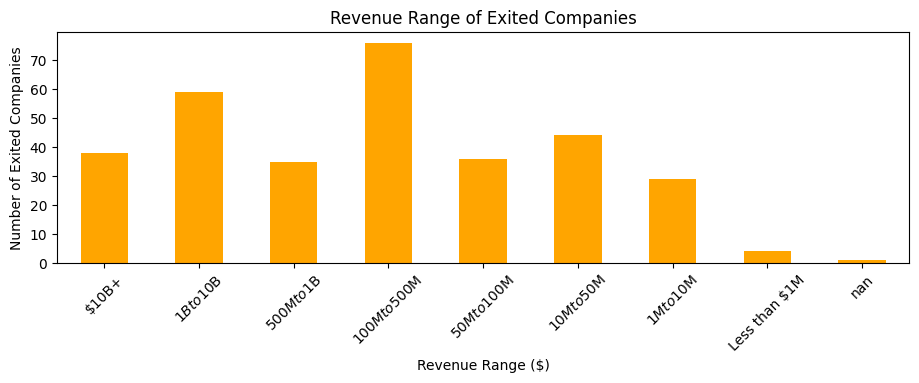

In [ ]:
# Filtering Exited Companies
exits = df1[exited][['COMPANY_NAME','CATEGORY','REVENU_RANGE']]

# Group exited companies by their revenue range
rev_exit = exits.groupby(['REVENU_RANGE'])['COMPANY_NAME'].count().reset_index()
rev_exit.columns = ['REVENUE_RANGE', 'EXIT_COUNTS']

# Sorting according to different revenue range
revenue_order = ['$10B+', '$1B to $10B', '$500M to $1B', '$100M to $500M', '$50M to $100M', '$10M to $50M', '$1M to $10M', 'Less than $1M', '-']

rev_exit['REVENUE_RANGE'] = pd.Categorical(rev_exit['REVENUE_RANGE'],
                                           categories = revenue_order,
                                           ordered=True)

rev_exit.sort_values('REVENUE_RANGE',inplace=True)
rev_exit.reset_index(drop=True, inplace=True)

print(rev_exit,
      '\n\nTotal exits =',
      rev_exit['EXIT_COUNTS'].sum())

# Visually illustrating the data
rev_exit_fig = rev_exit.plot.bar(x='REVENUE_RANGE',
                                 y='EXIT_COUNTS',
                                 title='Revenue Range of Exited Companies',
                                 color='orange',
                                 legend=False,
                                 figsize=(11,3))

rev_exit_fig.set_xlabel('Revenue Range ($)')
rev_exit_fig.set_ylabel('Number of Exited Companies')

plt.xticks(rotation=45)

plt.show()

*Among the 322 exited companies, approximately 24% (76 companies) reported revenues between $100 million and 500 million - the largest proportion. This trend may reflect investor confidence in the potential for these firms to achieve unicorn status. However, further detailed analysis is required to understand the factors driving these exits.*


---



##**5. Which category has the most exits?**

In [ ]:
# Split out each keyword of the entries in the 'CATEGORY'
cat_counts = exits['CATEGORY'].str.split(',').explode().str.strip().value_counts().reset_index()
cat_counts.columns = ['CATEGORY', 'EXIT_COUNTS']

cat_counts.head(10)

,CATEGORY,EXIT_COUNTS
0,Software,85
1,Internet,48
2,SaaS,47
3,Enterprise Software,47
4,Information Technology,45
5,E-Commerce,41
6,Financial Services,39
7,Health Care,34
8,Mobile,33
9,Finance,30


*Tech companies dominate the dataset in terms of exit counts, with the top six frequently appearing keywords being technology-related. While each company may be associated with multiple categories, indicating some overlap in counts, it is clear that the software category is the most sought after, with 85 exited companies linked to this sector.*


---


---





In [ ]:
# Check df2 shape
df2.shape

(5937, 5)

In [ ]:
# Drop duplicated entries in df2, if any
df2.drop_duplicates().shape

(4770, 5)

In [ ]:
# Double check & drop if there're more duplicates given more refining criterias
df2 = df2.drop_duplicates(subset=['COMPANY_NAME','FUNDING_TYPE','ANNOUNCED_DATE'],
                          keep='first')

df2.shape

(4747, 5)

In [ ]:
# Cleaning 'MONEY_RAISED' column:
# Replacing str '-' to NA
df2['MONEY_RAISED'] = df2['MONEY_RAISED'].replace('—', pd.NA)

# Standardize currency to US$
import re

exchange_rate = {
    '$': 1,
    '€': 1.09 ,
    '¥': 0.0065 ,
    '₹': 0.012,
    '£': 1.3,
    'CA$': 0.72 ,
    'A$': 0.65,
    'CN¥': 0.14,
    'R$': 0.17,
    'ZAR': 0.057,
    'SGD': 0.76,
    '₩': 0.00072,
    'CHF': 1.16,
    'MYR': 0.22,
    'SEK': 0.093,
    'RUB': 0.01
}

def convert_to_usd(money_str):
  try:
    match = re.search(r'([^\d]+)(\d[\d,]+)',money_str)
    if match:
      currency = match.group(1)
      amount_str = match.group(2).replace(',', '')
      amount = float(amount_str)

      if currency in exchange_rate:
        return amount * exchange_rate[currency]
      else:
        return money_str
    else:
      return money_str
  except (ValueError, TypeError):
    return money_str

df2.loc[:,'MONEY_RAISED_FLOAT'] = df2['MONEY_RAISED'].apply(convert_to_usd)

<ipython-input-13-4ff77ed99ef4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-4ff77ed99ef4>:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##**6. How many companies have received at least one round of investment?**

In [ ]:
df2['COMPANY_NAME'].nunique()

935

*Of the 1000 companies analyzed, 935 received at least one round of investment, though some amounts raised were not disclosed*

##**7. How is the distribution of investment rounds across the years?**

In [ ]:
# Convert to date and extract the year
df2['ANNOUNCED_DATE'] = pd.to_datetime(df2['ANNOUNCED_DATE'])
df2['YEAR'] = df2['ANNOUNCED_DATE'].dt.year

# Focus on year_counts of 2000-2021 for clarity of bar plot
df2_filtered = df2[(df2['YEAR'] >= 2000) & (df2['YEAR'] <= 2021)]

year_counts = df2_filtered['YEAR'].value_counts().reset_index().sort_values(by='YEAR')

# New column for YoY growth %
year_counts['YoY_Growth%'] = year_counts['count'].pct_change() * 100

# Visually illustrating the data
year_counts_fig = px.bar(year_counts,
                         x='YEAR',
                         y='count',
                         title='Yearly Investment Rounds (2000-2021)',
                         labels={'count': 'Number of Investment Rounds', 'YEAR': 'Year'},
                         text='count')

year_counts_fig.show()

print('Total Inv. Rounds (2000-2021):', year_counts['count'].sum(),
      '\nTotal Inv. Rounds (all years):', df2['YEAR'].value_counts().sum(),
      '\n\n', year_counts.tail(10))

<ipython-input-15-8048c71fe797>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-8048c71fe797>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total Inv. Rounds (2000-2021): 4727 
Total Inv. Rounds (all years): 4747 

    YEAR  count  YoY_Growth%
9  2012    188    30.555556
7  2013    257    36.702128
6  2014    357    38.910506
4  2015    433    21.288515
5  2016    427    -1.385681
3  2017    470    10.070258
2  2018    481     2.340426
1  2019    507     5.405405
0  2020    859    69.428008
8  2021    236   -72.526193


*With a total of 4,727 investment rounds from year 2000-2021 documented in the dataset, it is evident that investment activity significantly increased over the past decade. The trend peaked in 2020 with 859 rounds, reflecting a substantial Y-o-Y growth of nearly 70%. However, in 2021, there was a notable decline, which coincided with the onset of the COVID-19 pandemic.*


---



##**8. On average, how much has each company received at Series A?**

In [ ]:
series_A = (df2['FUNDING_TYPE'] == 'Series A')
df_series_A = df2[series_A]

# Sum up each company's Series A money received
df_series_A1 = df2[series_A].groupby('COMPANY_NAME')['MONEY_RAISED_FLOAT'].sum().sort_values(ascending=False).reset_index()

# Formatting number to $ for readability
df_series_A1['MONEY_RAISED_$'] = df_series_A1['MONEY_RAISED_FLOAT'].apply(lambda x: f"${x:,.0f}")

# Convert '0' back to NA
df_series_A1['MONEY_RAISED_FLOAT'] = df_series_A1['MONEY_RAISED_FLOAT'].replace(0, pd.NA)
df_series_A1['MONEY_RAISED_FLOAT'] = pd.to_numeric(df_series_A1['MONEY_RAISED_FLOAT'], errors='coerce')

# Inspecting NA counts in Series A funding
A_NA_counts = (df_series_A1['MONEY_RAISED_FLOAT'].isnull().sum())
A_total_counts = df_series_A['COMPANY_NAME'].count()
print('SERIES A',
      '\nNA counts: ', A_NA_counts,
      '\nTotal counts: ', A_total_counts,
      '\n% of NA counts: ', f"{A_NA_counts/A_total_counts*100:,.2f}%")

# Mean, min, max
mean_series_A = df_series_A1['MONEY_RAISED_FLOAT'].mean()
fillNA_mean = df_series_A1['MONEY_RAISED_FLOAT'].fillna(mean_series_A).mean()

min_series_A = df_series_A1['MONEY_RAISED_FLOAT'].min()
max_series_A = df_series_A1['MONEY_RAISED_FLOAT'].max()

print('\nMean:', f"${fillNA_mean:,.0f}",
      '\nMin:',  f"${min_series_A:,.0f}",
      '\nMax:', f"${max_series_A:,.0f}")

SERIES A 
NA counts:  29 
Total counts:  659 
% of NA counts:  4.40%

Mean: $28,831,909 
Min: $32,000 
Max: $2,002,000,000


*The Series A funding data reveals a substantial range, with a min of $32000 and a max of \$2 billion. On average, each company received approximately \$28.8 million in Series A funding.*

*p/s: Given that only 4.4% of the money_raised entries for Series A are NA, dropping them or filling with the mean would yield similar results in this case. However, for consistency, fillNA method shall be used throughout. (if similar analysis to be done for other funding series)*


---



##**9. Which types of companies attracted the most Series A investors?**


In [ ]:
# Add a new 'MONEY_RAISED_$' column for readability
df_series_A['MONEY_RAISED_$'] = df_series_A['MONEY_RAISED_FLOAT'].apply(lambda x: f"${x:,.0f}")

# Extract columns required, then merge with df1 'CATEGORY'
df_series_A = df_series_A[['COMPANY_NAME','MONEY_RAISED_FLOAT','MONEY_RAISED_$','ANNOUNCED_DATE']].sort_values('MONEY_RAISED_FLOAT', ascending=False)
merge_series_A = (df_series_A.merge(df1[['COMPANY_NAME','CATEGORY']],
                                    on='COMPANY_NAME',
                                    how='left'))

# Counts of each company category
A_cat_counts = merge_series_A['CATEGORY'].str.split(',').explode().str.strip().value_counts().reset_index()
A_cat_counts.columns = ['CATEGORY', 'COUNTS']

print(A_cat_counts.head(5))

             CATEGORY  COUNTS
0            Software     208
1             FinTech     112
2                SaaS     101
3  Financial Services      98
4            Internet      86


<ipython-input-17-497e148c3e7f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Software companies garnered the most interest from Series A investors in terms of the number of investment rounds. The money raised of respective category is not examined here as the significant spread in funding could distort the analysis by making the sector appear more attractive than it actually is due to outliers (apart from the category overlapping issues).*


---



##**10. What does the 90th percentile of Series A fundings reveal about the leading sectors and geographical distribution?**


In [ ]:
# Top 10% Money Raised ($)
top_quantile = merge_series_A['MONEY_RAISED_FLOAT'].quantile(0.9)
top_10 = merge_series_A[merge_series_A['MONEY_RAISED_FLOAT'] >= top_quantile]

# Merge with df1 'LOCATION'
top_10 = top_10.merge(df1[['COMPANY_NAME','LOCATION']],
                      on='COMPANY_NAME',
                      how='left')

# Category Counts
top10_cat_counts = top_10['CATEGORY'].str.split(',').explode().str.strip().value_counts().reset_index()
top10_cat_counts.columns = ['CATEGORY', 'COUNTS']

print(top10_cat_counts.head(5))

# Location Counts
top10_loc_counts = top_10['LOCATION'].str.split(',').explode().str.strip().value_counts().reset_index()
top10_loc_counts.columns = ['ORIGIN_COUNTRY', 'COUNTS']

print('\n', top10_loc_counts.head(5),'\n')

top_10.head(5)


             CATEGORY  COUNTS
0         Health Care      13
1            Software      13
2            Internet       9
3             Finance       9
4  Financial Services       8

    ORIGIN_COUNTRY  COUNTS
0   United States      42
1           China       8
2  United Kingdom       7
3         Finland       2
4          Sweden       2 



,COMPANY_NAME,MONEY_RAISED_FLOAT,MONEY_RAISED_$,ANNOUNCED_DATE,CATEGORY,LOCATION
0,JD Digits,2002000000.0,"$2,002,000,000",2017-03-02,"B2C, Finance, FinTech, Internet, Retail",China
1,Cainiao Logistics,1400000000.0,"$1,400,000,000",2016-03-14,"Delivery, Delivery Service, Logistics, Supply ...",China
2,Semiconductor Manufacturing International,1181320000.0,"$1,181,320,000",2001-09-01,"Hardware, Infrastructure, Manufacturing, Semic...",China
3,JD Health,1000000000.0,"$1,000,000,000",2019-05-13,"E-Commerce, Health Care, Medical, Nursing and ...",China
4,OneWeb,500000000.0,"$500,000,000",2015-06-26,"Aerospace, Database, Internet, Satellite Commu...",United Kingdom


*Both software and healthcare companies dominate the upper bracket of Series A funds raised. It is interesting to note that while most firms in the 90th quantile of Series A fundings are based in the United States (42 out of 62 firms), the top four by value are actually Chinese companies, each having raised $1 billion or more.*


---



---



In [ ]:
# Check df3 shape
df3.shape

(5289, 5)

In [ ]:
# Drop duplicated entries in df3, if any
df3.drop_duplicates().shape

(4196, 5)

In [ ]:
# Double check & drop if there're more duplicates given more refining criterias
df3.drop_duplicates(subset=['COMPANY_NAME','ACQUIREE_NAME','ANNOUNCED_DATE']).shape

(4195, 5)

##**11. What is the distribution of companies' acquisitions across the years?**

In [ ]:
# Convert to date and extract the year
df3['ANNOUNCED_DATE'] = pd.to_datetime(df3['ANNOUNCED_DATE'], format='mixed')
df3['ANNOUNCED_YEAR'] = df3['ANNOUNCED_DATE'].dt.year

# Focus on year_counts of 2000-2021 for clarity of bar plot
df3_filtered = df3[(df3['ANNOUNCED_YEAR'] >= 2000) & (df3['ANNOUNCED_YEAR'] <= 2021)]

year_counts = df3_filtered['ANNOUNCED_YEAR'].value_counts().reset_index().sort_values(by='ANNOUNCED_YEAR')

year_counts['YoY_Growth%'] = year_counts['count'].pct_change() * 100

# Visually illustrating the data
year_counts_fig = px.bar(year_counts,
                         x='ANNOUNCED_YEAR',
                         y='count',
                         title='Yearly Acquisitions (2000-2021)',
                         labels={'count': 'Number of Acquisitions', 'ANNOUNCED_YEAR': 'Announced Year'},
                         text='count')

year_counts_fig.show()

year_counts.tail(10)

,ANNOUNCED_YEAR,count,YoY_Growth%
8,2012,234,9.345794
9,2013,220,-5.982906
6,2014,352,60.000000
4,2015,387,9.943182
3,2016,401,3.617571
5,2017,382,-4.738155
2,2018,433,13.350785
1,2019,473,9.237875
0,2020,494,4.439746
7,2021,338,-31.578947


*The acquisition trend shows notable fluctuations, with periods of growth followed by sharp declines. Acquisitions peaked in 2014 with a 60% increase, after which growth continued at a slower pace before dipping in 2017 (-4.74%), and rebounded for the following years. In 2021, acquisitions plummeted by nearly 32%, marking the sharpest decline in the decade. This suggests a significant shift or disruption in the market, possibly due to broader economic factors.*

##**12. What are the proportions of different acquisition types?**

In [ ]:
df3['ACQUISITION_TYPE'] = df3['ACQUISITION_TYPE'].replace('—', pd.NA)

# Find out counts for each acq. type, including NA entries
df3['ACQUISITION_TYPE'].value_counts(dropna=False)

,count
ACQUISITION_TYPE,
Acquisition,4087
<NA>,840
Leveraged Buyout,234
Acquihire,108
Merger,18
Management Buyout,2


*Out of 4195 unique entries, 4087 of them (or 97%) are of acquisition, warranting a closer examination of this particular acquisition type*


---



#**13. Which company has the largest number of acquisitions?**

In [ ]:
# Focus on 'Acquisition' only
df3_acq = df3[df3['ACQUISITION_TYPE'] == 'Acquisition']

# Find out acquisition counts for each company
# Then merge with df1 CATEGORY to understand their industry
acq_count = df3_acq['COMPANY_NAME'].value_counts().reset_index()
acq_count = acq_count.merge(df1[['COMPANY_NAME','CATEGORY']],
                          on='COMPANY_NAME',
                          how='left')

pd.set_option('display.max_colwidth', None)

acq_count.head(5)

,COMPANY_NAME,count,CATEGORY
0,Accenture,212,"Construction, Consulting, Information Technology, Outsourcing"
1,Cisco,196,"Communications Infrastructure, Enterprise Software, Hardware"
2,Microsoft,151,"Cloud Computing, Collaboration, Consumer Electronics, Developer Tools, Enterprise Software, Operating Systems, Software"
3,IBM,125,"Business Development, Business Information Systems, Collaboration, Computer, CRM, Developer Platform, Enterprise Software, Hardware, Quantum Computing, Software"
4,Google,114,"Ad Network, Blogging Platforms, Collaboration, Email, Enterprise Software, Information Technology, Search Engine, Software, Video Streaming"


*Accenture leads the list with the highest number of acquisitions, totaling 212, just ahead of Cisco, which has made 196 acquisitions. Upon examining the top 5 companies based on acquisition numbers, it's clear that tech firms, particularly those in the software sector, are the most active acquirers.*


---



#**14. What is the distribution of Accenture's acquisitions over the years?**


In [ ]:
# Convert to date and extract the year
df3['ANNOUNCED_DATE'] = pd.to_datetime(df3['ANNOUNCED_DATE'], format='mixed')
df3['ANNOUNCED_YEAR'] = df3['ANNOUNCED_DATE'].dt.year

# Focus on Accenture
# Find out number of acquisitions announced by Accenture over the years
accenture = df3[(df3['COMPANY_NAME'] == 'Accenture')]

acc_year_counts = accenture['ANNOUNCED_YEAR'].value_counts().reset_index().sort_values(by='ANNOUNCED_YEAR')

# Visually illustrating the data
acc_year_counts_fig = px.bar(acc_year_counts,
                         x='ANNOUNCED_YEAR',
                         y='count',
                         title="Accenture's Yearly Acquisitions",
                         labels={'count': 'Number of Acquisitions', 'ANNOUNCED_YEAR': 'Announced Year'},
                         text='count')

acc_year_counts_fig.update_xaxes(dtick=1)

acc_year_counts_fig.show()

*The trend in Accenture's acquisitions from 2001 to 2021 shows a clear upward trajectory. While acquisitions were relatively sparse from the early years (2001-2014), Accenture significantly ramped up its acquisition strategy starting in 2015. Notable surges occurred in 2015, 2017, 2020, and 2021, with an average of 22 acquisitions per year in the latter half of the decade. This reflects Accenture's aggressive approach to growth through acquisition, aiming to expand its capabilities in key areas such as digital, cloud, and AI, as well as strengthen its overall market position.*

# **15. Which company has the highest total acquisition value over the years?**

In [ ]:
# Cleaning 'PRICE' column for analysis
df3_acq['PRICE'] = df3_acq['PRICE'].replace('—',pd.NA)

df3_acq['PRICE_FLOAT'] = pd.to_numeric(df3_acq['PRICE'].apply(convert_to_usd), errors='coerce')

# Sum up each company's total acquisition value
acq_value = df3_acq.groupby('COMPANY_NAME')['PRICE_FLOAT'].sum().reset_index()
acq_value['PRICE_FLOAT_$'] = acq_value['PRICE_FLOAT'].apply(lambda x: f"${x:,.0f}")
acq_value = acq_value.sort_values(by='PRICE_FLOAT', ascending=False)

print(acq_value.head(5))

# The top one i.e. Pfizer's number of acquisitions?
print('\n',acq_count[acq_count['COMPANY_NAME']=='Pfizer'][['COMPANY_NAME','count']])

# Inspecting potential reason why Accenture is not on the list
accenture_na = (df3_acq['COMPANY_NAME'] == 'Accenture') & (df3_acq['PRICE'].isna())
accenture_na_count = df3_acq[accenture_na].shape
print('\n', "Accenture's NA counts:", accenture_na_count[0],'out of 212')

                COMPANY_NAME   PRICE_FLOAT     PRICE_FLOAT_$
302                   Pfizer  2.171900e+11  $217,190,000,000
252                Microsoft  8.942620e+10   $89,426,200,000
401  The Walt Disney Company  8.487000e+10   $84,870,000,000
233           Liberty Global  6.708800e+10   $67,088,000,000
79                     Cisco  6.662140e+10   $66,621,399,998

    COMPANY_NAME  count
27       Pfizer     30

 Accenture's NA counts: 207 out of 212


<ipython-input-26-7b2dc3d095dd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-7b2dc3d095dd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Despite having only 30 acquisitions over the years, Pfizer's total acquisition value stands at an impressive \$217 billion—almost double that of the companies ranked immediately below it. A quick search reveals that Pfizer's biggest acquisition, the $90bn Walner Lambert deal in year 2000 made it the world's second biggest pharmaceutical company.*

*Microsoft and Cisco, known for their large number of acquisitions, have total acquisition values that align with their activity, as both appear in the top 5 list. Note that one possible reason Accenture is not on this list is that the majority of their acquisition values were not disclosed—only 5 out of their 212 acquisitions have publicly available financial details.*



---


---



In [ ]:
# Check df4 shape
df4.shape

(20702, 4)

In [ ]:
# Drop duplicated entries in df4, if any
df4.drop_duplicates().shape

(20702, 4)

In [ ]:
# Drop all NA in 'ATTENDED_SCHOOLS'
df4 = df4[['JOB_TITLES','COMPANY_NAME','ATTENDED_SCHOOLS']].dropna(subset=['ATTENDED_SCHOOLS'])
df4.shape

(6584, 3)

# **16. Which of these companies have their CEOs graduated from a top school?**

In [ ]:
# Filter 'CEO'
df_ceo = df4[df4['JOB_TITLES'].str.startswith('CEO')]

# Define top schools
top_schools_keywords = ['MIT', 'Stanford', 'Harvard', 'Columbia', 'Wharton', 'Yale']

# Filter companies where CEO graduated from a top school
df_ceo['IS_TOP_SCHOOL'] = df_ceo['ATTENDED_SCHOOLS'].apply(lambda x: any(keyword.lower() in x.lower()
                                                  for keyword in top_schools_keywords) if pd.notna(x)
                                                  else False
)
# Filter to see only the CEOs who attended top schools
top_sch_ceo = df_ceo[df_ceo['IS_TOP_SCHOOL'] == True]
print('Total No. of CEOs that Attended Top Schools:', top_sch_ceo.shape[0])

# Which companies they are from? How many of them in each company?
print('\n',top_sch_ceo['COMPANY_NAME'].value_counts())

Total No. of CEOs that Attended Top Schools: 37

 COMPANY_NAME
Google                 2
Morgan Stanley         2
Rover                  1
Inscripta              1
Vonage                 1
Beeswax                1
Foursquare             1
Solv                   1
Minerva                1
Virta Health           1
OneWeb                 1
Roche                  1
Lark                   1
MercadoLibre           1
OutSystems             1
Investcorp             1
Comcast                1
Encantos               1
Stripe                 1
Etsy                   1
Amazon Web Services    1
Netflix                1
Nubank                 1
CARS24                 1
DoorDash               1
AngelList              1
1mg                    1
Landit                 1
Ripple                 1
SoFi                   1
Incredible Health      1
Groupon                1
Apollo                 1
Metromile              1
Corning                1
Name: count, dtype: int64


<ipython-input-30-6de933344526>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*Given the narrow scope of top school keywords and missing entries in the dataset, there are 37 CEOs from top schools associated with the list of companies shown above.*

**